# ADS Homework #2
Monday 2-5pm Session, Proffessor Tim Savage

Please submit this assignment to the NYU Classes 'Assignments' section by 12:00pm on Monday, October 8, strictly labeling the assignments with the format **'ADS_HW1_(your net ID).ipynb'**. Be sure not to confuse Net ID (e.g. 'acs882') with N-number ('N166...'). This homework is here for you to better understand and practice the material; while you may discuss approaches to problems with your classmates (in fact, this is encouraged!), please ensure that all final code submitted is your own. You may reach out to the TA, Alex Shannon, at acs882@nyu.edu at anytime (he hangs out at CUSP a lot, so feel free to say hello). Additionally, Professor Savage will hold office hours on Mondays from 9am-12am; a location for this will be confirmed and communicated shortly.

### Problem 1 - PM2.5 Concentration in Beijing (50 points)

**What is a PM2.5?**<br>
“Particulate matter” (PM) is the general term used for a mixture of solid particles and liquid droplets
found in the air. The '2.5' specifies particles with aerodynamic diameters less than or equal to 2.5 microns (μm). This is very small - to put in in perspective, it would take about 30 of these, lined up next to each other, to cover the width of a human hair. They result from a variety of activities, including power plants, motor vehicles, airplanes, residential wood burning, forest fires, agricultural burning, volcanic eruptions (hopefully not something to worry about in NYC) and dust storms.<br>
**Why is this important to cities?**<br>
An extensive body of scientific evidence shows that short- or long-term exposures to fine particles
can cause adverse cardiovascular effects, including heart attacks and strokes resulting in
hospitalizations and, in some cases, premature death. A number of studies have also linked fine
particle exposures to respiratory effects, including the exacerbation of asthma and other respiratory
illnesses (short-term exposures) and the impairment of lung development (long-term exposures). In short, PM2.5 poses public health risks, and is something which cities should be knowledgeable about; predicting when PM2.5 concentration will be particularly high could allow the city to issue warnings or place restrictions on certain activities (e.g. driving, industrial activity, etc.).<br>
**The Data**<br>
We will be looking specifically at Beijing from 2010-2014, using a variety of weather-related variables. Although there exists a time component, and other data sources could be merged to look for additional factors (this could be a great final project - think traffic data, air-taffic data, industrial activity, etc), we will specifically focused on weather for the purposes of this assignment. Please load and take a look at the data below. 

In [1]:
# load libraries; read in data
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import statsmodels as sm
import statsmodels.formula.api as smf
import statsmodels.api as sma
from statsmodels.graphics.api import abline_plot
import scipy
%matplotlib inline

beijing_pm = pd.read_csv('Beijing_PM2.5.csv')
beijing_pm.head(3)

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
0,1,2010,1,1,0,NaN,-21,-11.0,1021.0,NW,1.79,0,0
1,2,2010,1,1,1,NaN,-21,-12.0,1020.0,NW,4.92,0,0
2,3,2010,1,1,2,NaN,-21,-11.0,1019.0,NW,6.71,0,0


#### Description of Data

The data can be found, along with descriptions, at the following source: http://archive.ics.uci.edu/ml/datasets/Beijing+PM2.5+Data

**Attribute Information:**<br>
**No:** row number <br>
**year:** year of data in this row <br>
**month:** month of data in this row <br>
**day:** day of data in this row <br>
**hour:** hour of data in this row <br>
**pm2.5:** PM2.5 concentration (ug/m^3) <br>
**DEWP:** Dew Point (â„ƒ) <br>
**TEMP:** Temperature (â„ƒ) <br>
**PRES:** Pressure (hPa) <br>
**cbwd:** Combined wind direction <br>
**Iws:** Cumulated wind speed (m/s) <br>
**Is:** Cumulated hours of snow <br>
**Ir:** Cumulated hours of rain <br>

**1.1)** Data cleaning: As you can see, there are some *n/a* values in our dataframe that need to be removed. Do so, and while you're at it, remove any columns specifying date or time and the wind direction column, as we will not be using these in our analysis. Additionally, decimals should not be used in column names, as this can create problems further down the road - rename 'PM2.5' to simply 'PM25'. (The data are also messy in that the 'I' (i) in the last three columns is indistiguishable from a lower-case 'l' (L) in python's font. Please feel free to rename these to your choosing, however this is not required.) Show the first 5 rows of the cleaned dataset below, then print a descriptive table of the dataset (mean, stdev, etc). **(5 points)**

In [2]:
beijing_pm = pd.read_csv('Beijing_PM2.5.csv')

In [3]:
beijing_pm.dropna(axis='index',how='any',inplace=True)
beijing_pm.drop(['year', 'month', 'day', 'hour','cbwd'],axis=1, inplace=True)
beijing_pm.rename(columns = {'pm2.5':"PM25",'Iws':'iWS','Is':'IS','Ir':'IR'}, inplace=True)
beijing_pm.head(6)

,No,PM25,DEWP,TEMP,PRES,iWS,IS,IR
24,25,129.0,-16,-4.0,1020.0,1.79,0,0
25,26,148.0,-15,-4.0,1020.0,2.68,0,0
26,27,159.0,-11,-5.0,1021.0,3.57,0,0
27,28,181.0,-7,-5.0,1022.0,5.36,1,0
28,29,138.0,-7,-5.0,1022.0,6.25,2,0
29,30,109.0,-7,-6.0,1022.0,7.14,3,0


In [4]:
beijing_pm.describe()

,No,PM25,DEWP,TEMP,PRES,iWS,IS,IR
count,41757.000000,41757.000000,41757.000000,41757.000000,41757.000000,41757.000000,41757.000000,41757.000000
mean,22279.380104,98.613215,1.750174,12.401561,1016.442896,23.866747,0.055344,0.194866
std,12658.168415,92.050387,14.433658,12.175215,10.300733,49.617495,0.778875,1.418165
min,25.000000,0.000000,-40.000000,-19.000000,991.000000,0.450000,0.000000,0.000000
25%,11464.000000,29.000000,-10.000000,2.000000,1008.000000,1.790000,0.000000,0.000000
50%,22435.000000,72.000000,2.000000,14.000000,1016.000000,5.370000,0.000000,0.000000
75%,33262.000000,137.000000,15.000000,23.000000,1025.000000,21.910000,0.000000,0.000000
max,43824.000000,994.000000,28.000000,42.000000,1046.000000,565.490000,27.000000,36.000000


**1.2)** Take an initial look at the correlations among the variables to get a better intuition for the data. Plot the correlations in a heatmap table using the Seaborn library with the 'seismic' colormap (this provides for clearer visualization, and lets important values "jump out" at you more immediately - it is also comes across as less-scary when showing to non-data scientists). Try to adjust the figure-size so that it is not too compressed. Please include a brief summary of your observations.  **(5 points)**

In [5]:
corr_df = beijing_pm.corr()
print(corr_df)

            No      PM25      DEWP      TEMP      PRES       iWS        IS  \
No    1.000000 -0.017706  0.053953  0.088675 -0.025997 -0.064034 -0.032231   
PM25 -0.017706  1.000000  0.171423 -0.090534 -0.047282 -0.247784  0.019266   
DEWP  0.053953  0.171423  1.000000  0.823821 -0.777722 -0.293106 -0.034925   
TEMP  0.088675 -0.090534  0.823821  1.000000 -0.826903 -0.149613 -0.094785   
PRES -0.025997 -0.047282 -0.777722 -0.826903  1.000000  0.178871  0.070537   
iWS  -0.064034 -0.247784 -0.293106 -0.149613  0.178871  1.000000  0.022630   
IS   -0.032231  0.019266 -0.034925 -0.094785  0.070537  0.022630  1.000000   
IR   -0.018065 -0.051369  0.125341  0.049544 -0.080532 -0.009157 -0.009764   

            IR  
No   -0.018065  
PM25 -0.051369  
DEWP  0.125341  
TEMP  0.049544  
PRES -0.080532  
iWS  -0.009157  
IS   -0.009764  
IR    1.000000  


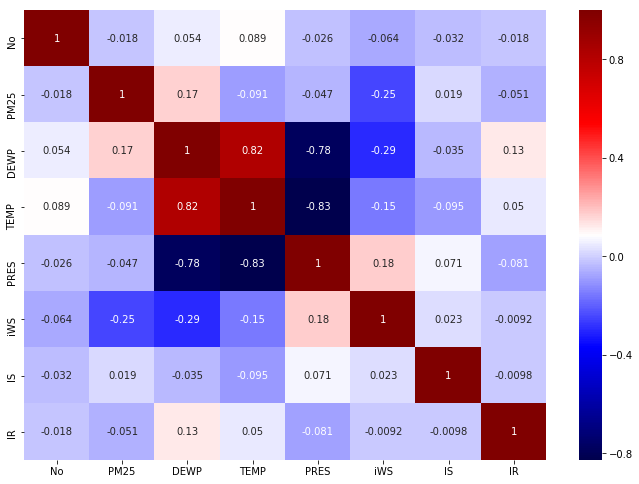

In [6]:
#index_list = np.array(beijing_pm['No']).tolist()
#temp_data = beijing_pm.drop(['DEWP','PRES','iWS','is','ir'],axis=1, inplace=True)
#beijing_pm.drop(['DEWP','PRES','iWS','is','ir'],axis=1, inplace=True)
fig,ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
# ax = sns.heatmap(TEMP_data)
#ax = sns.heatmap(temp_data)
#beijing_pm.head()
#df = pd.pivot_table(beijing_pm,values='PM25',index='iWS',columns='TEMP')
ax = sns.heatmap(corr_df,cmap='seismic',annot=True,)
#ax = sns.heatmap(beijing_pm['No'],beijing_pm['TEMP'],beijing_pm['PM25'])

### Figure 1: The heatmap of correlation coefficients of variables. The more red means the higher positive coefficients, the more blue means the lower negative coefficients.

**Summary:**

**1.3)** Using the independant variable with the strongest correlation (note: 'strong' is defined by absolute value) to PM2.5 concentration, run a single variable regression. Print the results, and write a brief interpretation of the R-squared. **(10 points)**

In [9]:
mod = smf.ols(formula='PM25 ~ iWS', data = beijing_pm).fit()
print(mod.summary())

                            OLS Regression Results                            
Dep. Variable:                   PM25   R-squared:                       0.061
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     2731.
Date:                Sun, 11 Nov 2018   Prob (F-statistic):               0.00
Time:                        15:25:39   Log-Likelihood:            -2.4677e+05
No. Observations:               41757   AIC:                         4.935e+05
Df Residuals:                   41755   BIC:                         4.936e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    109.5845      0.484    226.280      0.0

**Summary:** R-Square is the proportion of the variance in the dependent variable that is predictable from the independent variables. In this case, the R-Square value is only 0.061, although we can reject the null hypothesis, this model is not able to explain the relationship between IWS and PM25.

**1.4)** Now fit the regression with all of the independant variables. How does the R_squared change? What does this mean? How might colinearity impact our model? **(12 points)**

In [10]:
mod1 = smf.ols(formula='PM25 ~ DEWP+TEMP+PRES+iWS+IS+IR', data = beijing_pm).fit()
print(mod1.summary())

                            OLS Regression Results                            
Dep. Variable:                   PM25   R-squared:                       0.236
Model:                            OLS   Adj. R-squared:                  0.236
Method:                 Least Squares   F-statistic:                     2151.
Date:                Sun, 11 Nov 2018   Prob (F-statistic):               0.00
Time:                        15:26:58   Log-Likelihood:            -2.4247e+05
No. Observations:               41757   AIC:                         4.849e+05
Df Residuals:                   41750   BIC:                         4.850e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1728.4313     72.990     23.680      0.0

**Summary:** Compared to the former model, the R-Square, 0.236, is higher, which means that the model which including all variables can explain the relationship better than only IWS.

**1.5)** Run another regression on the data, this time removing the "DEWP" and "PRES" independant variables. What happens to the coefficients for the remaining variables? Why might this be the case? (Hint: look at your correlation table above) **(12 points)**

In [11]:
mod2 = smf.ols(formula='PM25 ~ TEMP+iWS+IS+IR', data = beijing_pm).fit()
print(mod2.summary())

                            OLS Regression Results                            
Dep. Variable:                   PM25   R-squared:                       0.080
Model:                            OLS   Adj. R-squared:                  0.080
Method:                 Least Squares   F-statistic:                     913.4
Date:                Sun, 11 Nov 2018   Prob (F-statistic):               0.00
Time:                        15:27:07   Log-Likelihood:            -2.4634e+05
No. Observations:               41757   AIC:                         4.927e+05
Df Residuals:                   41752   BIC:                         4.927e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    122.8806      0.681    180.543      0.0

**Summary:** After remove DEWP and PRES, the R-Square now is 0.080, it has a significant decreasement, illustrate that those two variables have a relative powerful ability to explain the relationship to PM25.

**1.6)** Calculate (either in python or by hand) the impact of a one standard deviation increase in *temperature* and a one standard deviation increase in *cumulative wind speed* for the models in **1.4** & **1.5**. **(6 points)**

In [13]:
mod1.params

Intercept    1728.431335
DEWP            4.282208
TEMP           -6.068101
PRES           -1.529141
iWS            -0.261641
IS             -2.266900
IR             -7.206350
dtype: float64

In [16]:
TEMP_STD = np.std(beijing_pm['TEMP'])
IWS_STD = np.std(beijing_pm['iWS'])
increase_TEMP_4 = mod1.params['TEMP']*TEMP_STD
increase_IWS_4 = mod1.params['iWS'] *IWS_STD
increase_TEMP_5 = mod2.params['TEMP']*TEMP_STD
increase_IWS_5 = mod2.params['iWS']*IWS_STD
print(increase_TEMP_4, '\n',
      increase_IWS_4,'\n',
     increase_TEMP_5,'\n',
      increase_IWS_5)

-73.87955204633363 
 -12.981838567758299 
 -11.689617827817806 
 -24.62395306223468


Answers: In model 1.4, when temperature increase ont standard deviation, the PM25 value will decrease 73.88; when cumulative wind speed increase ont standard deviation, the PM25 value will decrease 24.62; in model 1.5, when temperature increase ont standard deviation, the PM25 value will decrease 11.68; when cumulative wind speed increase ont standard deviation, the PM25 value will decrease 24.62

### Problem 2 - Polynomial Regression (30 points)

In [24]:
# let's create some artificial data
y  = [2.61338821976, 2.17035124741, 0.0495462311938, 1.15825768821, 1.39756687454, 1.77323953196]
x1 = [-0.5, -0.32, -0.14, 0.04, 0.22, 0.4]
df = pd.DataFrame(data=[y, x1], index=(['y', 'x1'])).T
df.head()

,y,x1
0,2.613388,-0.50
1,2.170351,-0.32
2,0.049546,-0.14
3,1.158258,0.04
4,1.397567,0.22


**2.1)** Draw a scatter plot of the data (no lines required). Does there seem to be an apparent line of best fit? **(5 points)**

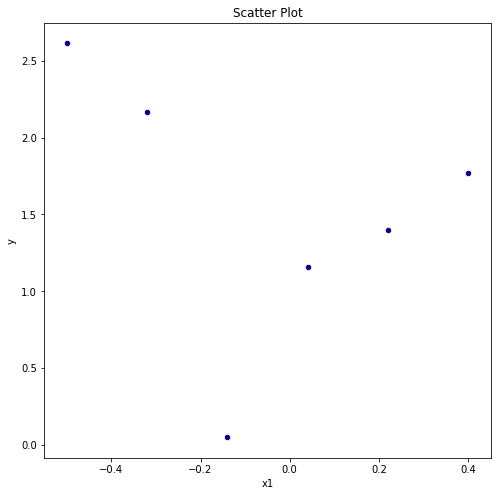

In [25]:
df.plot.scatter(x='x1',
                y='y',
               c='DarkBlue',
               figsize=(8,8),
               title='Scatter Plot')

### Figure 2: The scatter plot of x1 and y

**Summary:** According to the plot above, there isn't any apparently linear relationship between y and x1.

**2.2)** Our dependant variable *y*, in this case, does not appear to be a linear function of *x*. Create new columns in the dataframe for $x^2$, $x^3$, and $x^4$. **(5 points)**

In [26]:
x2 = []
x3 = []
x4 = []
for i in x1:
    x_2 = i**2
    x_3 = i**3
    x_4 = i**4
    x2.append(x_2)
    x3.append(x_3)
    x4.append(x_4)

**2.3)** For each of our polynomials (*x1, x2, x3, x4*), fit a model to *y*. Store and report the R-squared and parameters for each polynomial. Plot the R-squared values in a bar chart to see how they change with the polynomials. Which polynomial seems to be the best fit? Describe why this might be the case. **(10 points)**

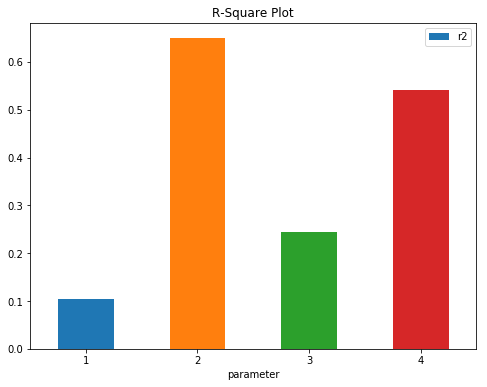

In [166]:
df_2 = pd.DataFrame(data=[y,x1,x2,x3,x4], index=(['yvalue', 'x1value','x2value','x3value','x4value'])).T
def func(var):
    regression_result = {}
    mod_2 = smf.ols(formula='y ~ var', data = df_2).fit()
    #regression_result['parameter'] = a
    #regression_result['R_suqare'] = mod_2.rsquared
    return mod_2.rsquared
#z = {**func(x1,1), **func(x2,2), **func(x3,3), **func(x4,4)}
#print(z)
#print(func(x1,1))
data_z = {'r2':[func(x1), func(x2), func(x3), func(x4)], 'parameter':[1,2,3,4]}
data_df = pd.DataFrame.from_dict(data_z)
#fig,ax = plt.subplots()
#ax.set_size_inches(12,8)
data_df.plot(kind='bar',x='parameter', y='r2', rot=0, figsize=(8,6),title='R-Square Plot')

### In the bar chart above, it seems that $x^2$ fits the best. In the scatter plot of y - x, with x value increase, the y value seems decrease at first and then increase. This tendency matches the function image of $f(x) = x^2$, thus, $x^2$ has the highest R-Square value.

### Figure 3: 

**2.4)** Plot a figure with 4 subfigures, one for each polynomial degree. In each subfigure:<br>
a) Draw the original scatter plot<br>
b) Plot the curve of the true function $f(x) = 9x^2 - x + 1$ (use np.linspace to create a line)<br>
c) Plot your fitted curve for each degree. Observe how our model fits the data as the degree changes.<br>
d) Having done this exercise, why might adding polynomials to our data be useful? What conclusions can we draw from fitting the four polynomials? **(10 points)**

In [155]:
def plotfunc(PAR,keyname):
    mod = smf.ols(formula='y ~ PAR', data = df_2).fit()
    Xline = np.linspace(df_2['x1value'][0], df_2['x1value'][5], 100, endpoint=True)
    FXline = 9*Xline*Xline - Xline +1
    figure, ax = plt.subplots(figsize=(6,6))
    ax.scatter(df_2[keyname], df_2['yvalue'], c='g',label='scatter point')
    #ax.lines(PAR, FXline, c='b')
    abline_plot(model_results=mod, ax=ax, color='red',label='fit line')
    plt.plot(Xline, FXline, label='$f(x)$')
    plt.xlabel(keyname, fontsize = 20)
    plt.ylabel('Y', fontsize = 20)
    plt.legend(fontsize=12)
    plt.xlim(-0.5,0.4)
    #ax = df_2.plot(kind='scatter',x=keyname, y='yvalue', figsize=(8,6),title=keyname+' plot')
    #return plot
    #plt.title('Figure 3: Regression Result', fontsize = 20)

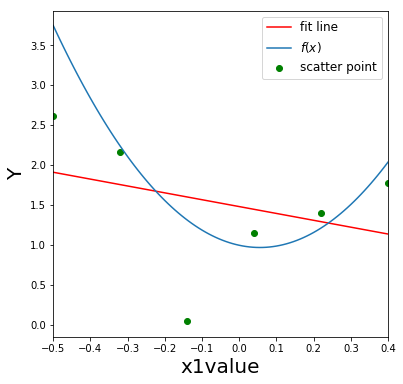

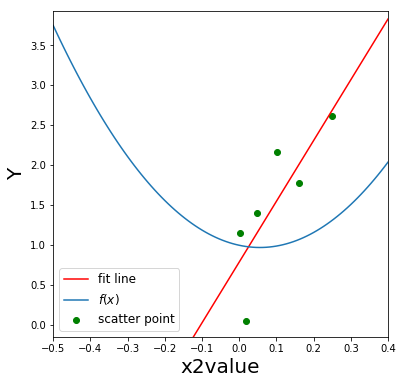

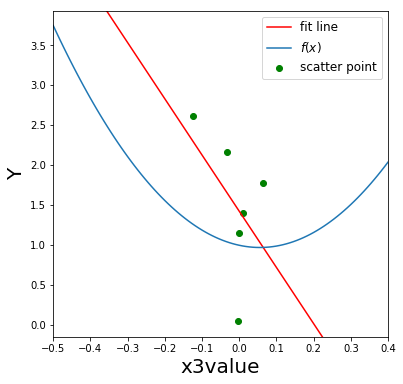

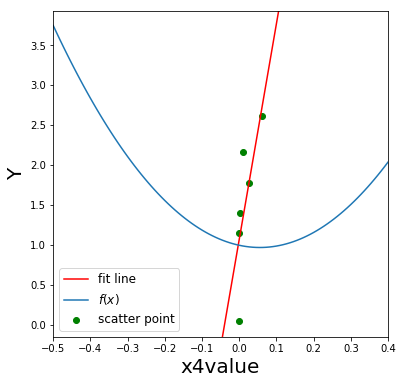

In [156]:
plotfunc(x1,'x1value')
plotfunc(x2,'x2value')
plotfunc(x3,'x3value')
plotfunc(x4,'x4value')

### Figure 4: In those 4 plots above, the line fits better and better. From the plots, it seems that $x^4$ explain the relationship between $y - x$ the best, however, the R-Square of this model is not the highest one. This situation is caused by all of the x values are lower than 1, thus, from 1 to 4 power, the values decrease. And in those plots above, I used the some the x axis scale, the distances from $x^4$ to fit line seem short. But comparing with the true value, the ratio of error is large.

### Problem 3 - Intro to Normalization (20 points)

This final problem is a brief exercise to explore the effects of normalization. We will be using household data from California, which was derived from the 1990 census. (https://www.kaggle.com/camnugent/california-housing-prices)

In [82]:
housing = pd.read_csv('housing.csv')
housing = housing[['median_income', 'median_house_value']][0:50]
housing.head()

,median_income,median_house_value
0,8.3252,452600.0
1,8.3014,358500.0
2,7.2574,352100.0
3,5.6431,341300.0
4,3.8462,342200.0


**3.1)** Are there any immediately obvious trends between our two variables? Sort the values by *median_house_value*, then plot the data. Write a brief description of what you see (or, more likely, what you don't see, and why that might be the case). **(10 points)**

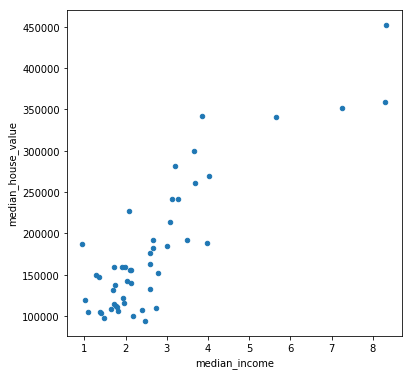

In [83]:
housing.sort_values(by = ['median_house_value'], inplace = True)
housing.plot(kind='scatter',x='median_income', y='median_house_value',figsize=(6,6))

**Summary:**

**3.2)** Orthonormalize the data so that the *mean* is 0 and the *st_dev* is 1. Write this as a python function that can be fed a dataframe and return an orthonormalized version (this should take no more than 4 lines of code). Plot an orthonormalized version of the housing data that you now have. Write a brief description of how it looks different than in *3.1* and ellaborate breifly on why and in what situations orthonormalization can be useful. **(10 points)**

,median_income,median_house_value,value_st,income_st
26,2.4597,93800.0,-1.038718,-0.156172
35,1.4861,97200.0,-0.997729,-0.754317
23,2.1806,99700.0,-0.967591,-0.327641
37,1.4103,103900.0,-0.916958,-0.800886
36,1.0972,104500.0,-0.909725,-0.993243


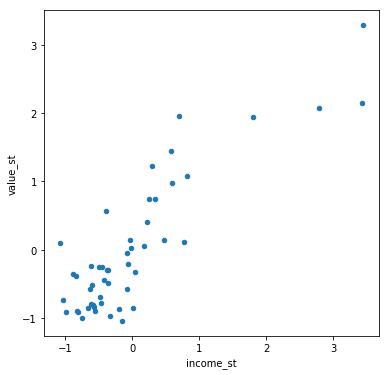

In [163]:
housing['value_st'] = ((housing['median_house_value'] - housing['median_house_value'].mean())/housing['median_house_value'].std())
housing['income_st'] = ((housing['median_income'] - housing['median_income'].mean())/housing['median_income'].std())
housing.plot(kind='scatter',x='income_st', y='value_st',figsize=(6,6))
housing.head()

### Actually, I think this operation is not orthonormalize, it is normalization. And normalization will not change the relationship between values, thus, the distribution of plot stay still.

**Summary:**